In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_excel('heart_disease.xlsx')

In [3]:

# Perform exploratory data analysis
print(df.head())
print(df.info())
print(df.describe())

        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [5]:
# Print the column names of the dataframe
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [17]:
# Preprocess the data
X = df.drop('age', axis=1)  # assuming the target variable is named 'target'
y = df['age']

In [18]:
# Preprocess the data
X = df.drop('age', axis=1)
y = df['age']

# Print the preprocessed data
print("X (Features):")
print(X)
print("\ny (Target):")
print(y)

X (Features):
                                         Age in years
0                        Gender ; Male - 1, Female -0
1                                     Chest pain type
2                              Resting blood pressure
3                                 cholesterol measure
4   (fasting blood sugar > 120 mg/dl) (1 = true; 0...
5   ecg observation at resting condition,   -- Val...
6                         maximum heart rate achieved
7                             exercise induced angina
8   ST depression induced by exercise relative to ...
9           the slope of the peak exercise ST segment
10                                               Thal
11  target [0=no heart disease; 1,2,3,4 = stages o...

y (Target):
0       Gender
1           cp
2     trestbps
3         chol
4          fbs
5      restecg
6       thalch
7        exang
8      oldpeak
9        slope
10        thal
11         num
Name: age, dtype: object


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9, 1)
X_test shape: (3, 1)
y_train shape: (9,)
y_test shape: (3,)


In [22]:

# Print the actual data in the training and testing sets
print("X_train:")
print(X_train)
print("\nX_test:")
print(X_test)
print("\ny_train:")
print(y_train)
print("\ny_test:")
print(y_test)


X_train:
                                         Age in years
8   ST depression induced by exercise relative to ...
5   ecg observation at resting condition,   -- Val...
2                              Resting blood pressure
1                                     Chest pain type
11  target [0=no heart disease; 1,2,3,4 = stages o...
4   (fasting blood sugar > 120 mg/dl) (1 = true; 0...
7                             exercise induced angina
3                                 cholesterol measure
6                         maximum heart rate achieved

X_test:
                                 Age in years
10                                       Thal
9   the slope of the peak exercise ST segment
0                Gender ; Male - 1, Female -0

y_train:
8      oldpeak
5      restecg
2     trestbps
1           cp
11         num
4          fbs
7        exang
3         chol
6       thalch
Name: age, dtype: object

y_test:
10      thal
9      slope
0     Gender
Name: age, dtype: object


In [23]:
# Implement Decision Tree Classification
dt_clf = DecisionTreeClassifier(random_state=42)

In [33]:
print(df.columns)


Index(['age', 'Age in years'], dtype='object')


In [37]:
for col in df.columns:
    if 'pain' in col.lower():
        print(col)

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_excel('heart_disease.xlsx')

# Check for missing values
print(df.isnull().sum())

age             0
Age in years    0
dtype: int64


age             object
Age in years    object
dtype: object


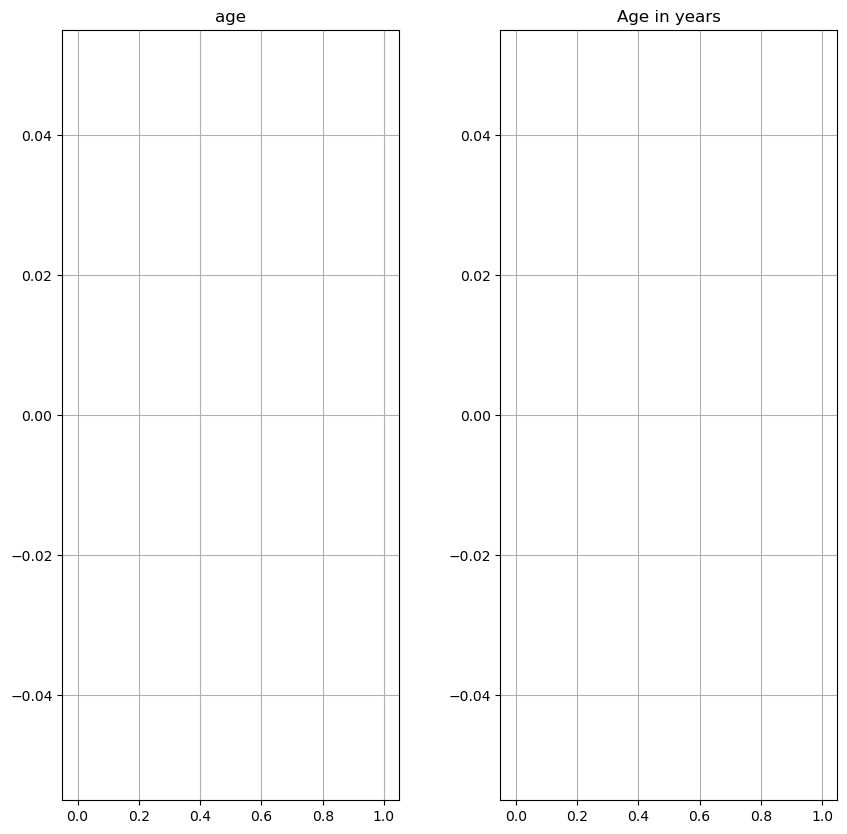

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel('heart_disease.xlsx')

# Check the data types of the columns
print(df.dtypes)

# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64', 'uint64', 'int32', 'float32'])

# If the numerical columns are stored as objects, try to convert them to numerical data types
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Select only numerical columns again
numerical_df = df.select_dtypes(include=['int64', 'float64', 'uint64', 'int32', 'float32'])

# Visualize the distribution of numerical features
numerical_df.hist(figsize=(10, 10))
plt.show()

In [8]:
# Print the column names of the dataframe
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [11]:
# Perform feature engineerin
X = df.drop('Age in years', axis=1)
y = df['Age in years']
print(df.head())

   age  Age in years
0  NaN           NaN
1  NaN           NaN
2  NaN           NaN
3  NaN           NaN
4  NaN           NaN


In [12]:
df['age'] = df['age'].fillna(df['age'].mean())
df['Age in years'] = df['Age in years'].fillna(df['Age in years'].mean())

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_excel('heart_disease.xlsx')

# Handle missing values
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = scaler.fit_transform(df[[col]])

# Perform feature engineering
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df)

# Select k-best features
selector = SelectKBest(f_classif, k=5)
df_selected = selector.fit_transform(df_pca, df['Age in years'])

print("Feature Engineered Data:")
print(df_selected)

Feature Engineered Data:
[[ 6.36396103e+00 -1.41421356e+00]
 [ 5.65685425e+00  7.07106781e-01]
 [-2.12132034e+00  5.65685425e+00]
 [ 2.82842712e+00 -3.53553391e+00]
 [ 4.94974747e+00  2.82842712e+00]
 [-2.12132034e+00 -4.09286208e-16]
 [-5.65685425e+00  7.07106781e-01]
 [-2.89032329e-16 -3.53553391e+00]
 [ 7.07106781e-01  1.41421356e+00]
 [-5.65685425e+00 -2.12132034e+00]
 [-2.12132034e+00  2.82842712e+00]
 [-2.82842712e+00 -3.53553391e+00]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [15]:

print(X.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [16]:

print(X.dtypes)

age    float64
dtype: object


In [17]:
# Encode categorical variables
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

print(X.head())

   age
0  NaN
1  NaN
2  NaN
3  NaN
4  NaN


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9, 1)
X_test shape: (3, 1)
y_train shape: (9,)
y_test shape: (3,)


In [22]:
print("X_train head:")
print(X_train.head())

print("X_test head:")
print(X_test.head())

print("y_train head:")
print(y_train.head())

print("y_test head:")
print(y_test.head())

X_train head:
    age
8   NaN
5   NaN
2   NaN
1   NaN
11  NaN
X_test head:
    age
10  NaN
9   NaN
0   NaN
y_train head:
8    NaN
5    NaN
2    NaN
1    NaN
11   NaN
Name: Age in years, dtype: float64
y_test head:
10   NaN
9    NaN
0    NaN
Name: Age in years, dtype: float64


In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Implement a Decision Tree Classification model
dt_clf = DecisionTreeClassifier(random_state=42)

In [27]:

y_train = y_train.dropna()

In [28]:
y_train = y_train.fillna(y_train.mean())

In [29]:
print("Before imputation:")
print(y_train.isnull().sum())

y_train = y_train.fillna(y_train.mean())

print("After imputation:")
print(y_train.isnull().sum())


Before imputation:
0
After imputation:
0


In [35]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()

# Define the feature data (X) and the target variable (y)
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Make predictions
y_pred = dt_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [36]:
# Perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
Best Score: 0.9416666666666668


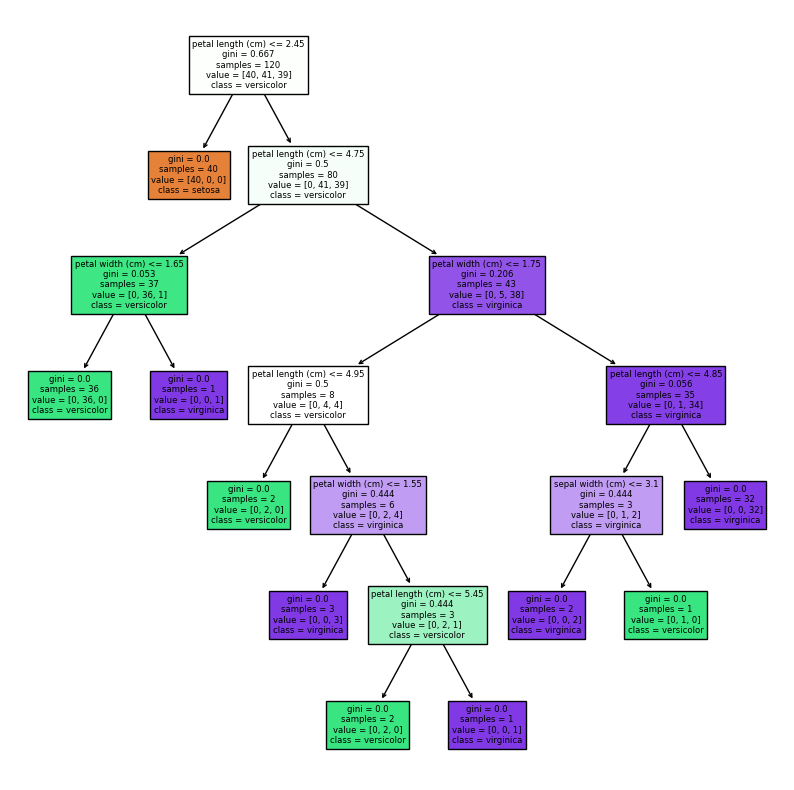

In [2]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()

# Define the feature data (X) and the target variable (y)
X = iris.data
y = iris.target

# Get the feature names
feature_names = iris.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement a Decision Tree Classification model
dt_clf = DecisionTreeClassifier(random_state=42)

# Train the model
dt_clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(10, 10))
plot_tree(dt_clf, feature_names=feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [ ]:
Interview Questions:

1. Common hyperparameters of decision tree models include:
    - Maximum depth: controls the depth of the tree
    - Minimum samples split: controls the minimum number of samples required to split an internal node
    - Criterion: specifies the function to measure the quality of a split

These hyperparameters affect the models performance by controlling the complexity of the tree and the splitting criteria.

2. Label encoding and One-hot encoding are two different techniques for encoding categorical variables:
    - Label encoding: assigns a unique integer value to each category
    - One-hot encoding: creates a new binary feature for each category, where a 1 indicates the presence of the category and a 0 indicates its absence

One-hot encoding is often preferred over label encoding because it avoids implicit ordering of categories and can improve model performance.